In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.feature
import skimage.color
from tqdm import tqdm
from keras.datasets import cifar10
from sklearn.svm import LinearSVC
import os
import pickle

Using TensorFlow backend.


In [2]:
print('Loading cifar10..')
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

Loading cifar10..


Plotting..


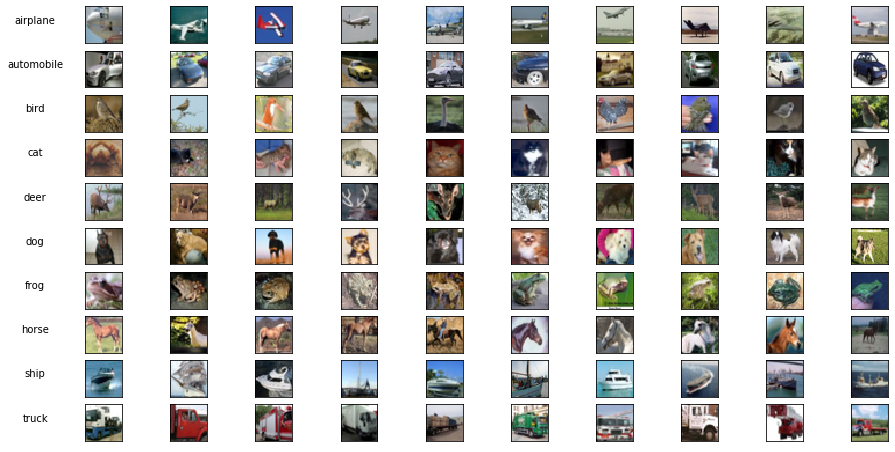

In [3]:
# A helper function for plotting sample images from dataset
def plot_images(images, labels, num_samples):
    cifar_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    fig, axes = plt.subplots(num_samples,num_samples,figsize=(15,8))
    for row in range(num_samples):
        images_for_label = [img for img, label in zip(images, labels) if label == row]
        random_indices = np.random.choice(range(len(images_for_label)), num_samples, replace=False)
        for col, random_idx in enumerate(random_indices):
            axes[row][col].imshow(images_for_label[random_idx])
            axes[row][col].get_xaxis().set_ticks([])
            axes[row][col].get_yaxis().set_ticks([])
        axes[row][0].set_ylabel(cifar_classes[row], labelpad=50,  rotation=0)
    #plt.subplots_adjust(left=0.1, right=0.2)
    plt.savefig('cifar_sample', bbox_inches='tight')

print('Plotting..')
plot_images(X_train, Y_train, 10)

In [4]:
Y_train = Y_train.flatten()
Y_test = Y_test.flatten()

In [6]:
print('Extracting HoG features')

############################################################
# extract_features 함수 작성
# 참고 : image의 HOG feature를 추출하여 저장

def extract_features(data):
    data_hog = []
    
    for image in tqdm(data):
        fd = skimage.feature.hog(image)
        data_hog.append(fd)
        
        
    return np.array(data_hog)

############################################################


X_train_features = extract_features(X_train)
X_test_features = extract_features(X_test)
print(X_train_features.shape) # (50000, 324)
print(X_test_features.shape) # (10000, 324)

  0%|          | 182/50000 [00:00<00:27, 1813.07it/s]

Extracting HoG features


100%|██████████| 10000/10000 [00:04<00:00, 2119.43it/s]


(50000, 324)
(10000, 324)


In [7]:
Y_train = Y_train.flatten()
Y_test = Y_test.flatten()

In [14]:
print('Training model')
model = LinearSVC(C=1e-1, verbose=True)
model.fit(X_train_features, Y_train)

Training model
[LibLinear]

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=True)

In [15]:
print('Train score', model.score(X_train_features, Y_train))
print('Test score', model.score(X_test_features, Y_test))

Train score 0.53158
Test score 0.517
